In [1]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel('2,3단계 상승.xlsx')
data.head()

,제품명,판매수량,상품설명
0,[La belle rose]뮤엔 셔링 보트넥티,66,-3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
1,[La belle rose]프레인 퍼프 스퀘어티,49,러블리한 무드의 퍼프 스퀘어티를 여름 시즌에도 즐겨보세요♥
2,1만장 돌파!/ [La belle rose]러브 퍼프 스퀘어티,38,프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
3,슬로아 쫀쫀 베이직티,35,찰랑찰랑 기분 좋은 착용감을 선사해 주는 레이온 함량의 베이직한 티셔츠♥
4,[La belle rose]언더 베이직 유넥티,33,매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D


In [4]:
#경고제어
import warnings
warnings.simplefilter("ignore") # 일치하는 경고 인쇄 x, simplefilter : 경고 필터 명세 목록에 간단한 항목을 삽입

#텍스트 분석에 필요한 konlpy 불러오기 및 버전 확인
import konlpy
konlpy.__version__

'0.5.2'

In [5]:
#KoNLPy의 OKT(형태소 분석기) 불러오기
from konlpy.tag import Okt

okt=Okt()
print(okt.pos("안녕하세요"))

[('안녕하세요', 'Adjective')]


In [6]:
!pip install nltk

In [7]:
import nltk
from konlpy.tag import Okt
t=Okt()

In [8]:
data.상품설명.astype('str')

0        -3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
1                       러블리한 무드의 퍼프 스퀘어티를 여름 시즌에도 즐겨보세요♥
2          프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
3               찰랑찰랑 기분 좋은 착용감을 선사해 주는 레이온 함량의 베이직한 티셔츠♥
4                 매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
                             ...                        
144    리본으로 묶을 수 있는 스트랩 끈이 함께 있어 러블리하고 페미닌한 무드를 더욱 살려...
145    유연한 소재감으로 장시간 착용에도 편안한 팬츠에요♥<br>한여름시즌에도 즐기기 좋은...
146    잔잔한 결이 느껴지는 가벼운 요루 원단으로 수수한 무드와 콩 모양의 단추로 귀여움을...
147           청순 & 여리 핏!<br>이너 아이템으로 활용하기 좋은 프릴 슬리브리스에요♥
148    포인트가 되어주는 페이크 포켓 디테일!<br>다양한 상의 아이템과 궁합이 좋은 미니...
Name: 상품설명, Length: 149, dtype: object

In [9]:
content_text=''

for each_line in data.상품설명.astype('str'):
    content_text=content_text + each_line + '\n'

In [10]:
print(data.상품설명)
print(data.shape)

0        -3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
1                       러블리한 무드의 퍼프 스퀘어티를 여름 시즌에도 즐겨보세요♥
2          프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
3               찰랑찰랑 기분 좋은 착용감을 선사해 주는 레이온 함량의 베이직한 티셔츠♥
4                 매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
                             ...                        
144    리본으로 묶을 수 있는 스트랩 끈이 함께 있어 러블리하고 페미닌한 무드를 더욱 살려...
145    유연한 소재감으로 장시간 착용에도 편안한 팬츠에요♥<br>한여름시즌에도 즐기기 좋은...
146    잔잔한 결이 느껴지는 가벼운 요루 원단으로 수수한 무드와 콩 모양의 단추로 귀여움을...
147           청순 & 여리 핏!<br>이너 아이템으로 활용하기 좋은 프릴 슬리브리스에요♥
148    포인트가 되어주는 페이크 포켓 디테일!<br>다양한 상의 아이템과 궁합이 좋은 미니...
Name: 상품설명, Length: 149, dtype: object
(149, 3)


In [11]:
tokens_ko=t.morphs(content_text)
tokens_ko

['-',
 '3',
 'kg',
 '효과',
 '의',
 '슬림',
 '여리핏',
 '>.<',
 '<',
 'br',
 '>',
 '편안하면서도',
 '꾸민듯',
 '하게',
 '연출',
 '하기',
 '좋아요',
 '!',
 '♡',
 '\n',
 '러블리',
 '한',
 '무드',
 '의',
 '퍼프',
 '스퀘어',
 '티',
 '를',
 '여름',
 '시즌',
 '에도',
 '즐겨',
 '보세요',
 '♥',
 '\n',
 '프롬',
 '데이',
 '원',
 '적극',
 '추천',
 '♥',
 '<',
 'br',
 '>',
 '몸매',
 '의',
 '장점',
 '만',
 '부각시켜',
 '주는',
 '러블리',
 '한',
 '퍼프',
 '스퀘어',
 '티',
 ':',
 'D',
 '\n',
 '찰랑찰랑',
 '기분',
 '좋은',
 '착용',
 '감',
 '을',
 '선사',
 '해',
 '주는',
 '레이온',
 '함량',
 '의',
 '베이직',
 '한',
 '티셔츠',
 '♥',
 '\n',
 '매',
 '일',
 '매일',
 '입고',
 '싶은',
 '차르르',
 '핏',
 '베이직',
 '티셔츠',
 '♡',
 '컬러',
 '별',
 '소장',
 '추천',
 '드려요',
 ':',
 'D',
 '\n',
 '화사한',
 '컬러',
 '감',
 '이',
 '매력',
 '적',
 '인',
 '골지',
 '가디건',
 '이에요',
 ':)<',
 'br',
 '>',
 '은은한',
 '자개',
 '단추',
 '와',
 '넥',
 '라인',
 '이',
 '포인트',
 '가',
 '되어줘요',
 '\n',
 '데이',
 '원',
 '라벨',
 '의',
 '시',
 '그',
 '니',
 '처',
 '컬러',
 '♥',
 '<',
 'br',
 '>',
 '애쉬',
 '계열',
 '의',
 '데님',
 '팬츠',
 '가',
 '추가',
 '되었어요',
 ':>',
 '\n',
 '오피스',
 '룩',
 ',',
 '데',
 '일리',
 '룩',
 '

In [12]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

3027
732


In [13]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200) # 가장 많이 나온 단어 200개

[('\n', 149),
 ('♥', 104),
 ('br', 82),
 ('>', 81),
 ('으로', 73),
 ('<', 54),
 (':)', 49),
 ('한', 47),
 ('이', 40),
 (',', 35),
 ('추천', 34),
 ('좋은', 34),
 ('에요', 34),
 ('의', 31),
 ('!', 28),
 ('컬러', 28),
 ('로', 28),
 ('디자인', 27),
 ('아이템', 27),
 ('♡', 25),
 ('활용', 25),
 ('하기', 23),
 ('무드', 23),
 ('감', 23),
 ('원피스', 23),
 ('을', 22),
 ('소장', 22),
 ('이에요', 22),
 ('라인', 21),
 ('포인트', 21),
 ('핏', 19),
 ('드려요', 19),
 ('가', 19),
 ('룩', 19),
 ('에', 19),
 ('연출', 17),
 ('여름', 17),
 ('착용', 17),
 ('!<', 17),
 ('과', 17),
 ('티셔츠', 15),
 ('인', 15),
 ('데', 15),
 ('일리', 15),
 ('를', 14),
 ('시즌', 14),
 ('베이직', 14),
 ('좋아요', 13),
 ('원', 13),
 ('적', 13),
 ('가디건', 13),
 ('소재', 13),
 ('게', 13),
 ('봄', 13),
 ('별', 12),
 ('매력', 12),
 ('있는', 12),
 ('스커트', 12),
 ('도', 12),
 ('러블리', 11),
 ('데이', 11),
 ('다양한', 11),
 ('즐기기', 11),
 ('니트', 11),
 ('하게', 10),
 ('프롬', 10),
 ('넥', 10),
 ('수', 10),
 ('강력', 10),
 ('바디', 10),
 ('하고', 9),
 ('롱', 9),
 ('스퀘어', 8),
 ('해', 8),
 ('팬츠', 8),
 ('가지', 8),
 ('너', 8),
 ('데이트', 8),
 ('입기',

In [14]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('\n', 149),
 ('♥', 104),
 ('br', 82),
 ('>', 81),
 ('<', 54),
 (':)', 49),
 ('추천', 34),
 ('좋은', 34),
 ('에요', 34),
 ('!', 28),
 ('컬러', 28),
 ('디자인', 27),
 ('아이템', 27),
 ('♡', 25),
 ('활용', 25),
 ('하기', 23),
 ('무드', 23),
 ('감', 23),
 ('원피스', 23),
 ('소장', 22),
 ('이에요', 22),
 ('라인', 21),
 ('포인트', 21),
 ('핏', 19),
 ('드려요', 19),
 ('룩', 19),
 ('연출', 17),
 ('여름', 17),
 ('착용', 17),
 ('!<', 17),
 ('티셔츠', 15),
 ('인', 15),
 ('일리', 15),
 ('시즌', 14),
 ('베이직', 14),
 ('좋아요', 13),
 ('원', 13),
 ('적', 13),
 ('가디건', 13),
 ('소재', 13),
 ('봄', 13),
 ('별', 12),
 ('매력', 12),
 ('스커트', 12),
 ('러블리', 11),
 ('데이', 11),
 ('다양한', 11),
 ('즐기기', 11),
 ('니트', 11),
 ('하게', 10),
 ('프롬', 10),
 ('넥', 10),
 ('강력', 10),
 ('바디', 10),
 ('하고', 9),
 ('롱', 9),
 ('스퀘어', 8),
 ('해', 8),
 ('팬츠', 8),
 ('가지', 8),
 ('너', 8),
 ('데이트', 8),
 ('입기', 8),
 ('스러운', 8),
 ('나시', 8),
 ('여리', 8),
 ('골지', 7),
 ('심플', 7),
 ('단독', 7),
 ('여리한', 7),
 ('좋아', 7),
 ('실루엣', 7),
 ('고급스러운', 7),
 ('차르르', 6),
 (':)<', 6),
 ('은은한', 6),
 ('꾸안꾸룩', 6),
 ('리하', 6)

In [21]:
review_stopwords=['\n','♥',':)','♡','<','br','>',':','D','!','+','원','넥','위','매','일','별','손','갈','부','플','nan','안',':))','터','티','기','나','반','극','!^_^','인','일','!<','에요','추천','연출','하기']
for word in review_stopwords:
    stop_words.append(word)

In [32]:
review_stopwords2=['좋은','디자인','해','무드','감','이에요']
for word in review_stopwords2:
    stop_words.append(word)

In [33]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('컬러', 28),
 ('아이템', 27),
 ('활용', 25),
 ('원피스', 23),
 ('소장', 22),
 ('라인', 21),
 ('포인트', 21),
 ('핏', 19),
 ('드려요', 19),
 ('룩', 19),
 ('여름', 17),
 ('착용', 17),
 ('티셔츠', 15),
 ('일리', 15),
 ('시즌', 14),
 ('베이직', 14),
 ('좋아요', 13),
 ('적', 13),
 ('가디건', 13),
 ('소재', 13),
 ('봄', 13),
 ('매력', 12),
 ('스커트', 12),
 ('러블리', 11),
 ('데이', 11),
 ('다양한', 11),
 ('즐기기', 11),
 ('니트', 11),
 ('하게', 10),
 ('프롬', 10),
 ('강력', 10),
 ('바디', 10),
 ('하고', 9),
 ('롱', 9),
 ('스퀘어', 8),
 ('팬츠', 8),
 ('가지', 8),
 ('너', 8),
 ('데이트', 8),
 ('입기', 8),
 ('스러운', 8),
 ('나시', 8),
 ('여리', 8),
 ('골지', 7),
 ('심플', 7),
 ('단독', 7),
 ('여리한', 7),
 ('좋아', 7),
 ('실루엣', 7),
 ('고급스러운', 7),
 ('차르르', 6),
 (':)<', 6),
 ('은은한', 6),
 ('꾸안꾸룩', 6),
 ('리하', 6),
 ('다양하게', 6),
 ('크롭', 6),
 ('예요', 6),
 ('멋', 6),
 ('구성', 6),
 ('느껴지는', 6),
 ('블라우스', 6),
 ('으로도', 6),
 ('에도', 5),
 ('주는', 5),
 ('데님', 5),
 ('깔끔한', 5),
 ('청순', 5),
 ('기장', 5),
 ('되는', 5),
 ('가능한', 5),
 ('더욱', 5),
 ('셔츠', 5),
 ('청순한', 5),
 ('코디', 5),
 ('없이', 5),
 ('랩', 5),
 ('여', 5),
 ('만점'

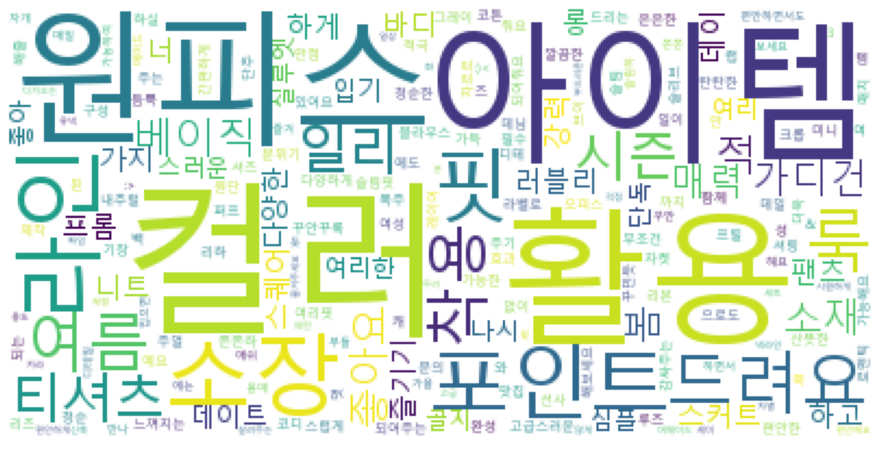

In [34]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
!pip install graphviz

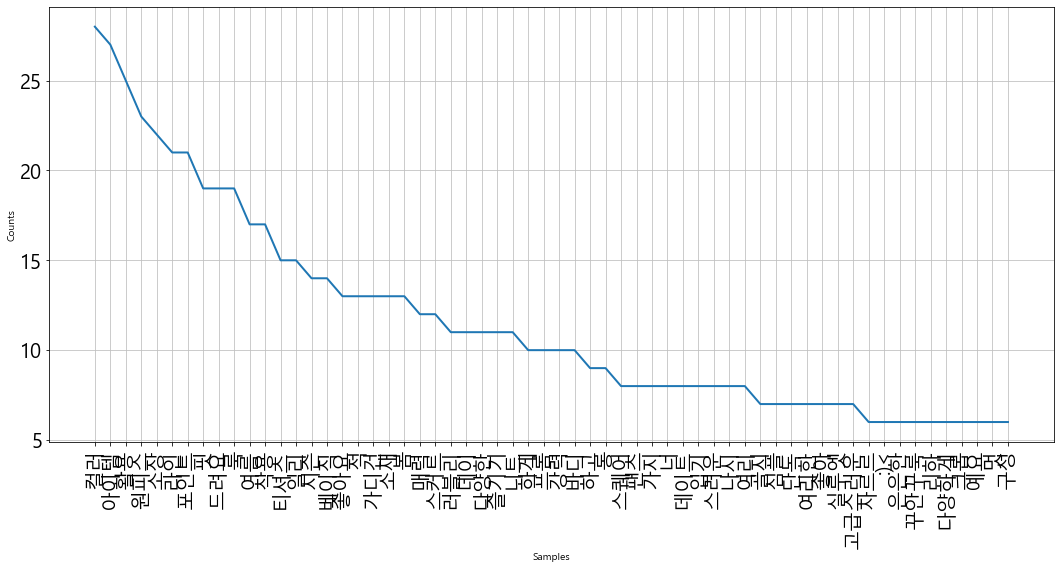

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ko.plot(60)
plt.show()